In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics.pairwise import cosine_similarity
plt.rcParams['font.size'] = 18

In [2]:
pre_synaptic = pd.read_csv("pre_synaptic_cells.csv", index_col = 0)
pre_synaptic

,1.2009142857142858,1.1989714285714286,1.1970285714285713,1.1950857142857143,1.193142857142857,1.1912,1.189257142857143,1.1873142857142858,1.1853714285714285,1.1834285714285715,...,-0.18434285714285714,-0.18628571428571428,-0.18822857142857147,-0.19017142857142857,-0.1921142857142857,-0.1940571428571429,-0.19599999999999995,-0.19794285714285714,-0.19988571428571433,-0.20182857142857138
xbc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
xbc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
xbc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
xbc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.188055,0.192641,0.201815,0.183468,0.146774,0.151361,0.165121,0.146774,0.110081,0.110081
xbc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.130981,0.123704,0.116427,0.123704,0.065490,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bc5t,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
bc5t,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
bc5t,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
bc5t,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [3]:
post_synaptic = pd.read_csv("post_synaptic_cells.csv", index_col = 0)
post_synaptic = post_synaptic.rename(index={'82n': '82n/wo', '82wo': '82n/wo', '7iv': '7iv/r/d', '7ir': '7iv/r/d', '7id': '7iv/r/d'})
post_synaptic

,1.2009142857142858,1.1989714285714286,1.1970285714285713,1.1950857142857143,1.193142857142857,1.1912,1.189257142857143,1.1873142857142858,1.1853714285714285,1.1834285714285715,...,-0.18434285714285714,-0.18628571428571428,-0.18822857142857147,-0.19017142857142857,-0.1921142857142857,-0.1940571428571429,-0.19599999999999995,-0.19794285714285714,-0.19988571428571433,-0.20182857142857138
2i,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000
2i,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000
2i,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000
2i,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000
2i,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000
85,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000
85,0.008990,0.062932,0.161825,0.206776,0.062932,0.242737,0.089903,0.017981,0.053942,0.071922,...,0.00899,0.00899,0.00899,0.00899,0.017981,0.00899,0.00899,0.00899,0.00899,0.00899
1ws,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000


In [4]:
df = pd.read_csv("RGC_type_correspondence_combined.csv")
df

,Goetz et al. (2022) Type,Bae et al. (2018) Eyewire type,Tran et al. (2019) Cluster
0,ON sus alpha,8w,C43
1,OFFhOS,2aw,C9
2,OFFvOS,2aw,C5
3,ON tr SmRF,6sn,C30
4,OFF tr alpha,4ow,C45
5,OFF tr SmRF,4i,C21
6,ONhOS SmRF,82wi,C27
7,ONhOS LgRF,82n/wo,C36
8,ONvOS SmRF,72,C38
9,"ON DS sus DN, T, V",7iv/r/d,C10


In [5]:
# Initialize an empty dictionary
rgc_map = {}

# Iterate over the rows of the dataframe
for index, row in df.iterrows():
    # Extract the value and key from the row
    value = row['Bae et al. (2018) Eyewire type']
    key = row['Tran et al. (2019) Cluster']
    
    # Extract the number from the 'key' column
    key_number = int(key[1:])
    
    # Adjust the key number by subtracting 1
    adjusted_key = key_number - 1
    
    # Add the key-value pair to the dictionary
    rgc_map[adjusted_key] = value

# Print the resulting dictionary
print(rgc_map)

{42: '8w', 8: '2aw', 4: '2aw', 29: '6sn', 44: '4ow', 20: '4i', 26: '82wi', 35: '82n/wo', 37: '72', 9: '7iv/r/d', 15: '37v', 23: '37r', 12: '5si', 5: '5so', 1: '5ti', 10: '51', 2: '63', 13: '73', 17: '3i', 24: '2o', 25: '27', 30: '9w', 41: '1wt', 11: '37c', 3: '2an', 40: '6sw'}


In [6]:
bc_map = {
    0:"bc1",
    1:"bc1",
    2:"bc2",
    3:"bc3a",
    4:"bc3b",
    5:"bc4",
    6:"bc5i",
    7:"bc5o",
    8:"bc5t",
    9:"xbc",
    10:"bc6",
    11:"bc7",
    12:"bc8/9",
    13:"bc8/9",
}

In [7]:
pre_synaptic_selected = pre_synaptic[pre_synaptic.index.isin(bc_map.values())]
pre_synaptic_selected

,1.2009142857142858,1.1989714285714286,1.1970285714285713,1.1950857142857143,1.193142857142857,1.1912,1.189257142857143,1.1873142857142858,1.1853714285714285,1.1834285714285715,...,-0.18434285714285714,-0.18628571428571428,-0.18822857142857147,-0.19017142857142857,-0.1921142857142857,-0.1940571428571429,-0.19599999999999995,-0.19794285714285714,-0.19988571428571433,-0.20182857142857138
xbc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
xbc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
xbc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
xbc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.188055,0.192641,0.201815,0.183468,0.146774,0.151361,0.165121,0.146774,0.110081,0.110081
xbc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.130981,0.123704,0.116427,0.123704,0.065490,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bc5t,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
bc5t,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
bc5t,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
bc5t,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [8]:
post_synaptic_selected = post_synaptic[post_synaptic.index.isin(rgc_map.values())]
post_synaptic_selected

,1.2009142857142858,1.1989714285714286,1.1970285714285713,1.1950857142857143,1.193142857142857,1.1912,1.189257142857143,1.1873142857142858,1.1853714285714285,1.1834285714285715,...,-0.18434285714285714,-0.18628571428571428,-0.18822857142857147,-0.19017142857142857,-0.1921142857142857,-0.1940571428571429,-0.19599999999999995,-0.19794285714285714,-0.19988571428571433,-0.20182857142857138
2aw,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2aw,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2aw,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2aw,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2aw,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8w,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8w,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1wt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1wt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
pre_synaptic_selected = pre_synaptic_selected.rename(index={'xbc': 'bc5xbc'})
pre_synaptic_selected

,1.2009142857142858,1.1989714285714286,1.1970285714285713,1.1950857142857143,1.193142857142857,1.1912,1.189257142857143,1.1873142857142858,1.1853714285714285,1.1834285714285715,...,-0.18434285714285714,-0.18628571428571428,-0.18822857142857147,-0.19017142857142857,-0.1921142857142857,-0.1940571428571429,-0.19599999999999995,-0.19794285714285714,-0.19988571428571433,-0.20182857142857138
bc5xbc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
bc5xbc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
bc5xbc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
bc5xbc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.188055,0.192641,0.201815,0.183468,0.146774,0.151361,0.165121,0.146774,0.110081,0.110081
bc5xbc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.130981,0.123704,0.116427,0.123704,0.065490,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bc5t,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
bc5t,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
bc5t,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
bc5t,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [10]:
# Load the dictionary from the pickle file
with open("bc_labels_dim0.pickle", "rb") as f:
    bc_labels_dim0 = pickle.load(f)
    
with open("bc_labels_dim1.pickle", "rb") as f:
    bc_labels_dim1 = pickle.load(f)
    
with open("bc_value_dim0.pickle", "rb") as f:
    bc_value_dim0 = pickle.load(f)
    
with open("bc_value_dim1.pickle", "rb") as f:
    bc_value_dim1 = pickle.load(f)

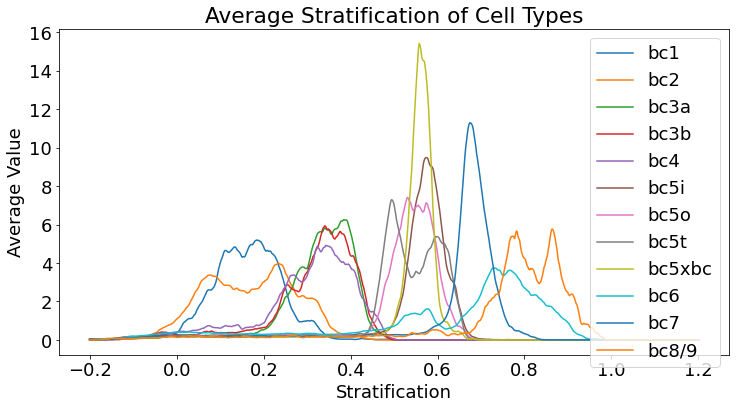

In [11]:
# Group the data by cell type and calculate the mean for each group (without categories)
average_stratification_bc = pre_synaptic_selected.groupby(level=0).mean()

# Transpose the dataframe for easier plotting
average_stratification_bc = average_stratification_bc.transpose()

# Convert the index to numeric for correct plotting
average_stratification_bc.index = pd.to_numeric(average_stratification_bc.index)

# Sort the index for correct plotting
average_stratification_bc = average_stratification_bc.sort_index()

# Plot the average stratification for each cell type
plt.figure(figsize=(12, 6))
for column in average_stratification_bc.columns:
    plt.plot(average_stratification_bc[column], label=column)
plt.title('Average Stratification of Cell Types')
plt.xlabel('Stratification')
plt.ylabel('Average Value')
plt.legend()
plt.show()

In [12]:
average_stratification_bc = average_stratification_bc.transpose()

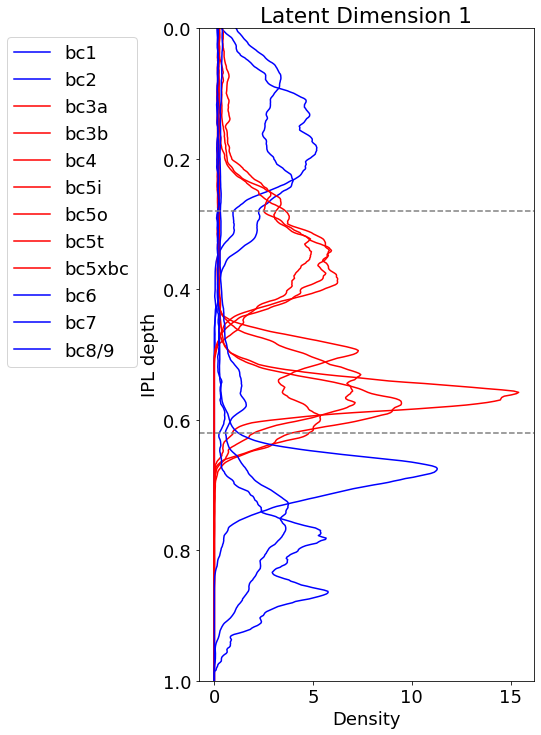

In [13]:
# Constrain the stratification range from 0 to 1.0
average_stratification_bc_constrained = average_stratification_bc.copy()
average_stratification_bc_constrained["category"] = average_stratification_bc_constrained.index.to_series().map({cell: 'pos' for cell in bc_labels_dim0['pos']}).fillna('neg')

# Plot the average stratification for each cell type with different colors for different categories
plt.figure(figsize=(6, 12))
for cell_type in average_stratification_bc_constrained.index.unique():
    if average_stratification_bc_constrained.loc[cell_type, "category"] == 'pos':
        color = 'r'
    else:
        color = 'b'
    # Switch x and y in the plot
    plt.plot(average_stratification_bc_constrained.loc[cell_type].drop('category').values, 
             average_stratification_bc_constrained.loc[cell_type].drop('category').index, 
             color=color, label=cell_type)
plt.legend(loc='upper left', bbox_to_anchor=(-0.6, 1))
plt.ylim([0, 1.0])
plt.title('Latent Dimension 1')
plt.ylabel('IPL depth')
plt.xlabel('Density')
plt.gca().invert_yaxis()

# Add horizontal lines
plt.axhline(y=0.28, color='gray', linestyle='--')
plt.axhline(y=0.62, color='gray', linestyle='--')

plt.savefig('figure3_bc_2d_l1_plot.svg', format='svg', bbox_inches='tight')
plt.show()

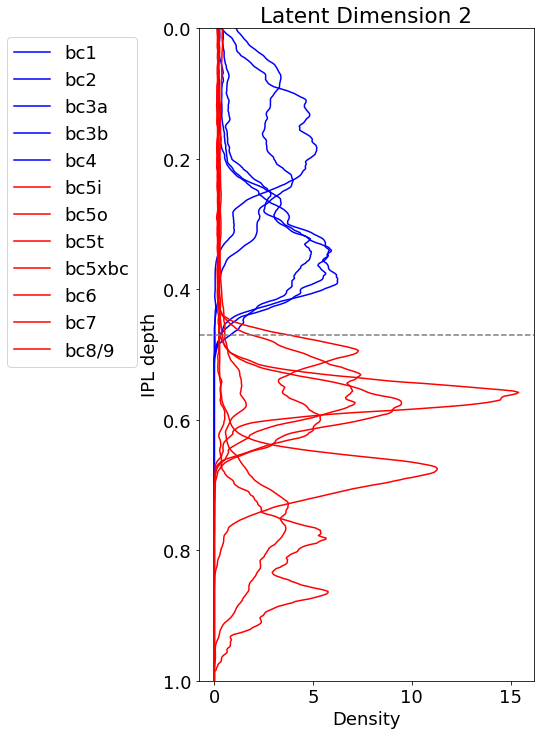

In [14]:
# Constrain the stratification range from 0 to 1.0
average_stratification_bc_constrained = average_stratification_bc.copy()
average_stratification_bc_constrained["category"] = average_stratification_bc_constrained.index.to_series().map({cell: 'pos' for cell in bc_labels_dim1['pos']}).fillna('neg')

# Plot the average stratification for each cell type with different colors for different categories
plt.figure(figsize=(6, 12))
for cell_type in average_stratification_bc_constrained.index.unique():
    if average_stratification_bc_constrained.loc[cell_type, "category"] == 'pos':
        color = 'r'
    else:
        color = 'b'
    # Switch x and y in the plot
    plt.plot(average_stratification_bc_constrained.loc[cell_type].drop('category').values, 
             average_stratification_bc_constrained.loc[cell_type].drop('category').index, 
             color=color, label=cell_type)
plt.legend(loc='upper left', bbox_to_anchor=(-0.6, 1))
plt.ylim([0, 1.0])
plt.title('Latent Dimension 2')
plt.ylabel('IPL depth')
plt.xlabel('Density')
plt.gca().invert_yaxis()

# Add horizontal lines
plt.axhline(y=0.47, color='gray', linestyle='--')

plt.savefig('figure3_bc_2d_l2_plot.svg', format='svg', bbox_inches='tight')
plt.show()

In [15]:
# Load the dictionary from the pickle file
with open("rgc_labels_dim0.pickle", "rb") as f:
    rgc_labels_dim0 = pickle.load(f)
    
with open("rgc_labels_dim1.pickle", "rb") as f:
    rgc_labels_dim1 = pickle.load(f)
    
# Load the dictionary from the pickle file
with open("rgc_value_dim0.pickle", "rb") as f:
    rgc_value_dim0 = pickle.load(f)
    
with open("rgc_value_dim1.pickle", "rb") as f:
    rgc_value_dim1 = pickle.load(f)

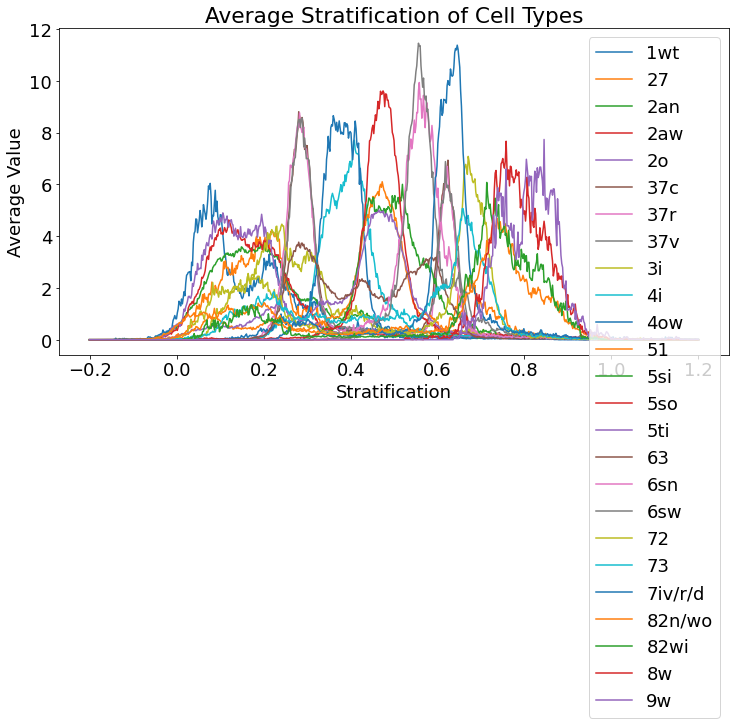

In [16]:
# Group the data by cell type and calculate the mean for each group (without categories)
average_stratification_rgc = post_synaptic_selected.groupby(level=0).mean()

# Transpose the dataframe for easier plotting
average_stratification_rgc = average_stratification_rgc.transpose()

# Convert the index to numeric for correct plotting
average_stratification_rgc.index = pd.to_numeric(average_stratification_rgc.index)

# Sort the index for correct plotting
average_stratification_rgc = average_stratification_rgc.sort_index()

# Plot the average stratification for each cell type
plt.figure(figsize=(12, 6))
for column in average_stratification_rgc.columns:
    plt.plot(average_stratification_rgc[column], label=column)
plt.title('Average Stratification of Cell Types')
plt.xlabel('Stratification')
plt.ylabel('Average Value')
plt.legend()
plt.show()

In [17]:
average_stratification_rgc = average_stratification_rgc.transpose()

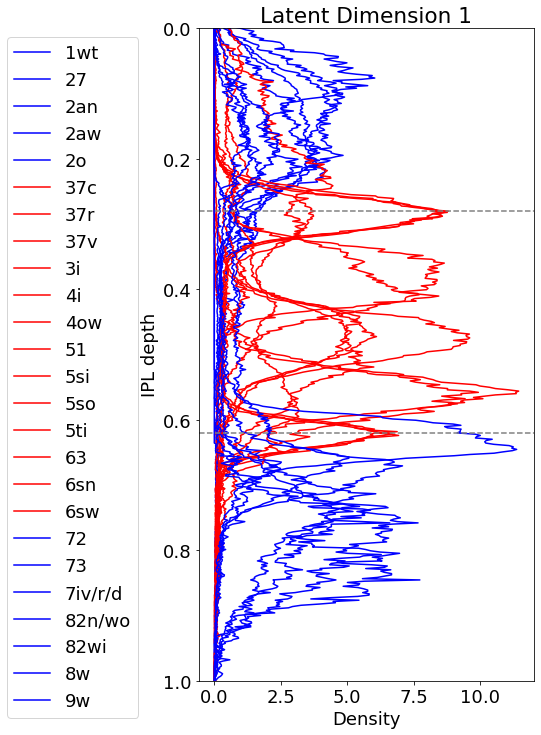

In [18]:
# Constrain the stratification range from 0 to 1.0
average_stratification_rgc_constrained = average_stratification_rgc.copy()
average_stratification_rgc_constrained["category"] = average_stratification_rgc_constrained.index.to_series().map({cell: 'pos' for cell in rgc_labels_dim0['pos']}).fillna('neg')

# Plot the average stratification for each cell type with different colors for different categories
plt.figure(figsize=(6, 12))
for cell_type in average_stratification_rgc_constrained.index.unique():
    if average_stratification_rgc_constrained.loc[cell_type, "category"] == 'pos':
        color = 'r'
    else:
        color = 'b'
    # Switch x and y in the plot
    plt.plot(average_stratification_rgc_constrained.loc[cell_type].drop('category').values, 
             average_stratification_rgc_constrained.loc[cell_type].drop('category').index, 
             color=color, label=cell_type)
plt.legend(loc='upper left', bbox_to_anchor=(-0.6, 1))
plt.ylim([0, 1.0])
plt.title('Latent Dimension 1')
plt.ylabel('IPL depth')
plt.xlabel('Density')
plt.gca().invert_yaxis()

# Add horizontal lines
plt.axhline(y=0.28, color='gray', linestyle='--')
plt.axhline(y=0.62, color='gray', linestyle='--')

plt.savefig('figure3_rgc_2d_l1_plot.svg', format='svg', bbox_inches='tight')
plt.show()

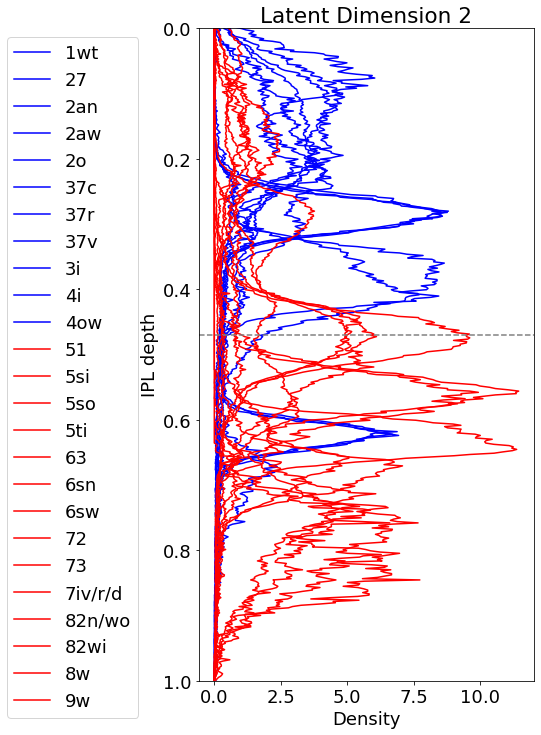

In [19]:
# Constrain the stratification range from 0 to 1.0
average_stratification_rgc_constrained = average_stratification_rgc.copy()
average_stratification_rgc_constrained["category"] = average_stratification_rgc_constrained.index.to_series().map({cell: 'pos' for cell in rgc_labels_dim1['pos']}).fillna('neg')

# Plot the average stratification for each cell type with different colors for different categories
plt.figure(figsize=(6, 12))
for cell_type in average_stratification_rgc_constrained.index.unique():
    if average_stratification_rgc_constrained.loc[cell_type, "category"] == 'pos':
        color = 'r'
    else:
        color = 'b'
    # Switch x and y in the plot
    plt.plot(average_stratification_rgc_constrained.loc[cell_type].drop('category').values, 
             average_stratification_rgc_constrained.loc[cell_type].drop('category').index, 
             color=color, label=cell_type)
plt.legend(loc='upper left', bbox_to_anchor=(-0.6, 1))
plt.ylim([0, 1.0])
plt.title('Latent Dimension 2')
plt.ylabel('IPL depth')
plt.xlabel('Density')
plt.gca().invert_yaxis()

# Add horizontal lines
plt.axhline(y=0.47, color='gray', linestyle='--')

plt.savefig('figure3_rgc_2d_l2_plot.svg', format='svg', bbox_inches='tight')
plt.show()